G:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1551: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


Phase Margin:84.317287 degrees at 0.995085 rad/s
Gain Margin:inf dB at nan rad/s


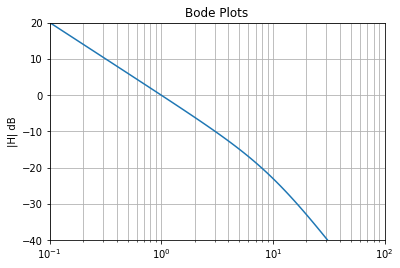

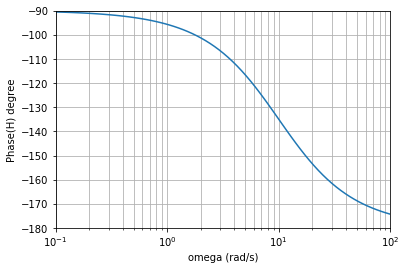

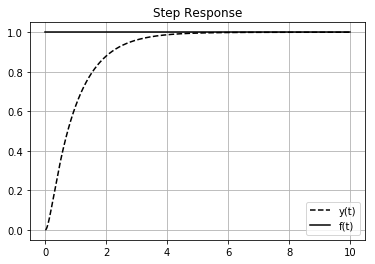

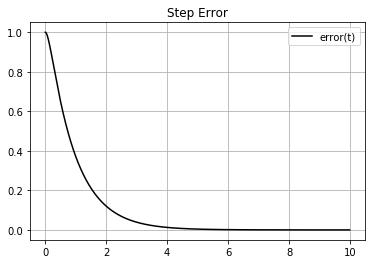

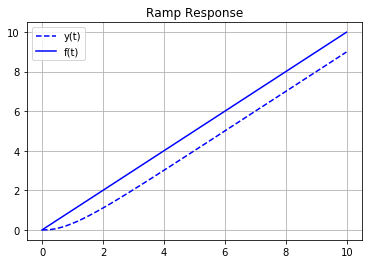

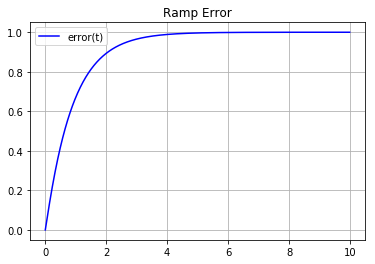

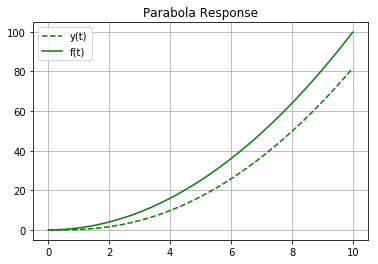

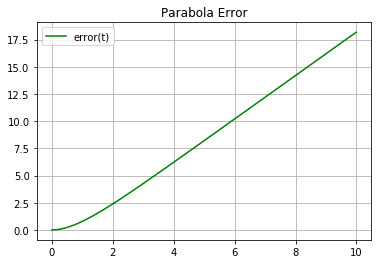

In [146]:
from control import margin ## you get this via this pip command: pip install control
from control import tf
from control import matlab
from scipy import signal as sig
import numpy as np
import matplotlib.pyplot as plt

num = np.array([0,0,10])
den = np.array([1,10,0])

system = sig.lti(num,den)

w, Hmag, Hphase = sig.bode(system)

##get the gain margin, phase margin, and there respective omegas
gm, pm, wg, wp = margin(tf(num,den))

##graphs and data on the phase margin and bode
print("Phase Margin:%f degrees at %f rad/s" %(pm,wp))
print("Gain Margin:%f dB at %f rad/s" %(20*np.log10(gm),wg)) ##phase margin is linear, need to translate to dB
plt.figure()
plt.title("Bode Plots")
plt.semilogx(w,Hmag)
plt.grid(which="both")
plt.ylabel("|H| dB")
plt.axis([10**(-1),10**(2),-40,20])
plt.figure()
plt.semilogx(w,Hphase)
plt.grid(which="both")
plt.ylabel("Phase(H) degree")
plt.xlabel("omega (rad/s)")
plt.axis([10**(-1),10**(2),-180,-90])
plt.show()

##start the process of finding the errors
dt = 0.01
NN = 1000
TT = np.arange(0,NN*dt,dt)
step = np.zeros(NN)
ramp = np.zeros(NN)
parabola = np.zeros(NN)
errS = np.zeros(NN)
errR = np.zeros(NN)
errP = np.zeros(NN)

for i in range(NN):
    step[i] = 1.0
    ramp[i] = (dt*i)
    parabola[i] = (dt*i)**(2)

##remember that our system is clsoed loop, this is important!
den = den + num

t1, y1, x1 = sig.lsim((sig.tf2ss(num,den)),step,TT)
t2, y2, x2 = sig.lsim((sig.tf2ss(num,den)),ramp,TT)
t3, y3, x3 = sig.lsim((sig.tf2ss(num,den)),parabola,TT)

for k in range(NN):
    errS[k] = step[k] - y1[k]
    errR[k] = ramp[k] - y2[k]
    errP[k] = parabola[k] - y3[k]

##lots of graphing, mainly here for demonstration
plt.figure()
plt.title("Step Response")
plt.plot(TT,y1,'k--', label="y(t)")
plt.plot(TT,step,'k', label="f(t)")
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.title("Step Error")
plt.plot(TT,errS,'k', label="error(t)")
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.title("Ramp Response")
plt.plot(TT,y2,'b--',label="y(t)")
plt.plot(TT,ramp,'b',label="f(t)")
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.title("Ramp Error")
plt.plot(TT,errR,'b',label="error(t)")
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.title("Parabola Response")
plt.plot(TT,y3,'g--',label="y(t)")
plt.plot(TT,parabola,'g',label="f(t)")
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.title("Parabola Error")
plt.plot(TT,errP,'g',label="error(t)")
plt.grid()
plt.legend()
plt.show()